##**Installing Dependencies**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc
import joblib
import streamlit as st
import warnings
warnings.filterwarnings("ignore")

##**Loading Dataset**

In [42]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = load_breast_cancer()
columns = ['ID', 'Diagnosis'] + [df.feature_names[i] for i in range(30)]
data = pd.read_csv(url, header=None, names=columns)

In [43]:
data.head() # Displaying First 5 rows

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
data.tail() # Displaying Last 5 rows

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


##**Preprocessing**

In [45]:
# Dropping Unnecessary column
data.drop('ID', axis=1, inplace=True)

In [46]:
data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1}) # Mapping the Categorical values to Numerical target values

In [47]:
data.duplicated().sum()

0

In [48]:
data.isnull().sum()

,0
Diagnosis,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0


In [49]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

In [50]:
data.info() # Getting info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [51]:
data.describe().T # Descriptive Statistics of the data

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


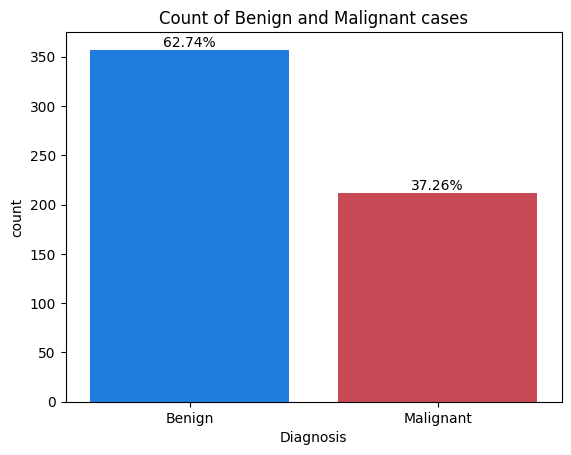

In [52]:
# Countplot of the target variable (Benign vs Malignant)
ax = sns.countplot(x='Diagnosis', data=data, palette=['#007bff', '#dc3545'])  # Change colors
plt.title('Count of Benign and Malignant cases')

# Calculate the total number of cases and the percentage
total = len(data['Diagnosis'])
# Loop over the bars in the plot
for p in ax.patches:
    count = int(p.get_height())  # Get the height of the bar (number of occurrences)
    percentage = (count / total) * 100  # Calculate percentage
    x_plot = p.get_x() + p.get_width() / 2  # X position for annotation
    y_plot = p.get_height()  # Y position (height of the bar)
    # Annotate percentage on top of the bars
    ax.annotate(f'{percentage:.2f}%', (x_plot, y_plot), ha='center', va='bottom')

# Change x-axis labels
ax.set_xticklabels(['Benign', 'Malignant'])
plt.show()

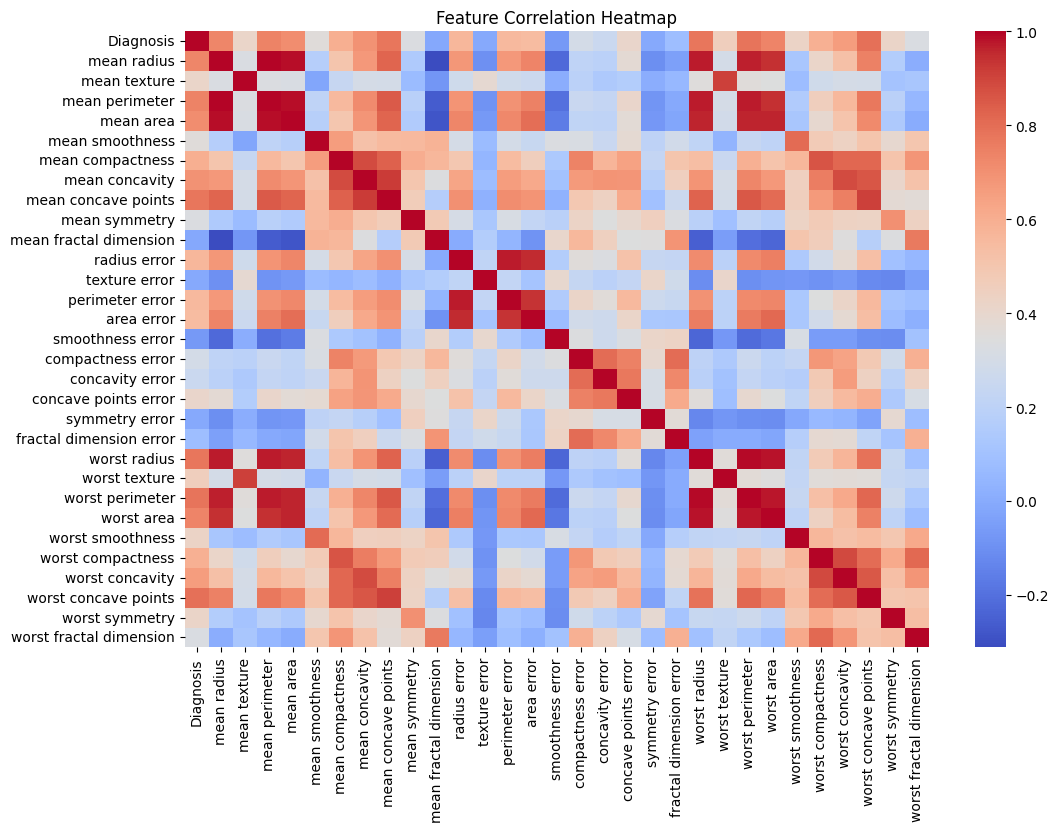

In [53]:
# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

##**Train & Test Splitting**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

##**Oversampling Using SMOTE**

In [55]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

##**Initialising AdaBoost Classifier**

In [56]:
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

##**Training & Evaluation of the Model**

In [57]:
# Training the model on train data
adaboost.fit(X_train_smote, y_train_smote)

# Evaluation of model on test data
y_pred = adaboost.predict(X_test)

print("Classification Report (Without Hyperparameter Tuning):")
print(classification_report(y_test, y_pred))

Classification Report (Without Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.97      0.95      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



###**Confusion Matrix**

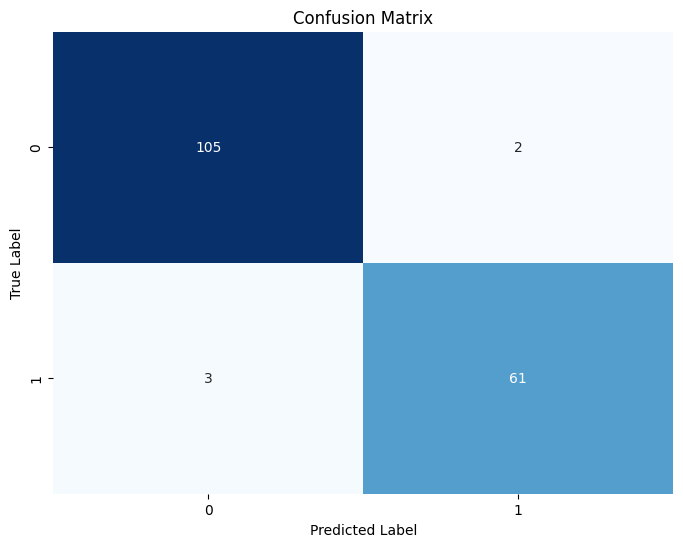

In [58]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn with the 'Blues' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##**Hyperparameter Tuning**

In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

##**Re-Evaluating using Best Model**

In [60]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
# Print the best score
print("Best score:", grid_search.best_score_)

print("Classification Report (With Hyperparameter Tuning):")
print(classification_report(y_test, y_pred_tuned))

Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best score: 0.9780000000000001
Classification Report (With Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



###**Confusion Matrix**

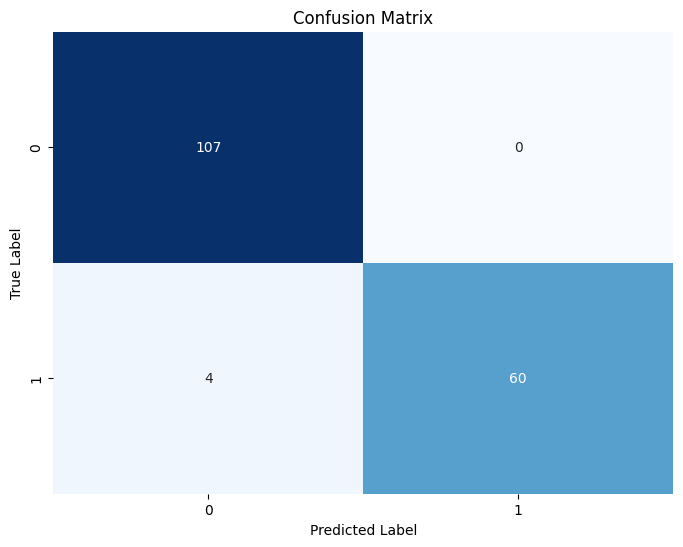

In [61]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Plot the confusion matrix using Seaborn with the 'Blues' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##**Feature Importance**

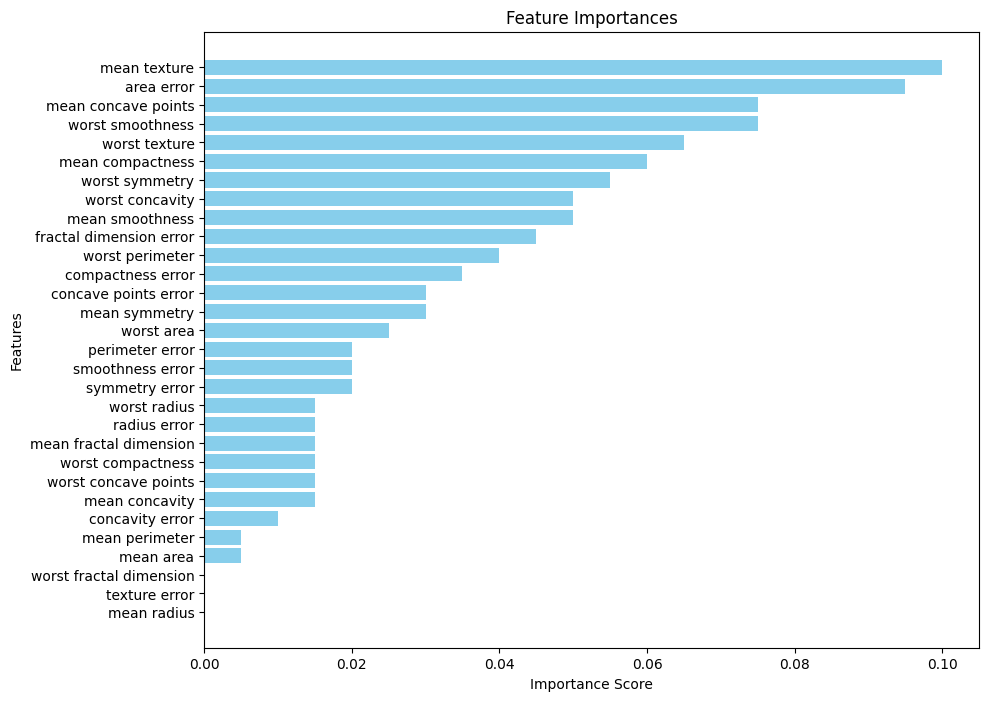

In [62]:
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()

##**ROC Curve & AUC area**

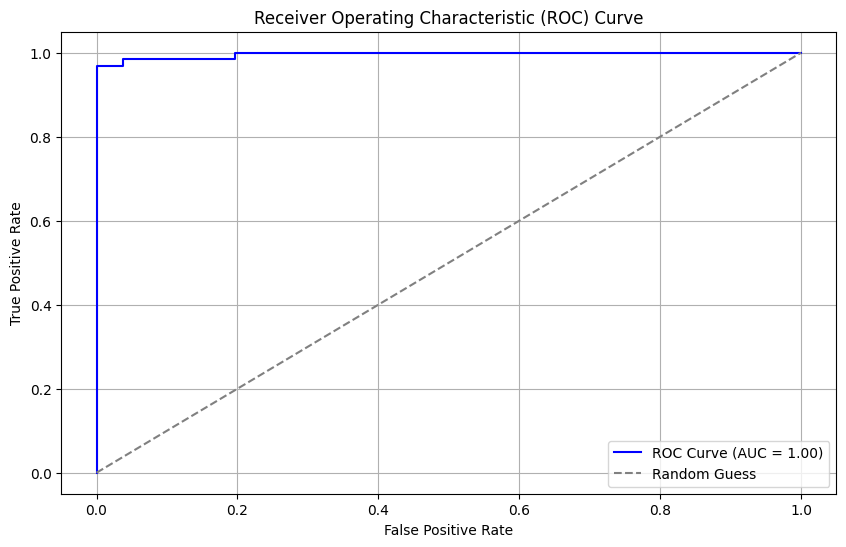

In [63]:
# Predict probabilities for the test set
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Malignant)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

##**Saving the Model**

In [64]:
# Assuming 'best_model' is the trained model you want to save
joblib.dump(best_model, 'adaboost_model.pkl')

print("Model saved successfully.")

Model saved successfully.
